# Stocks News Analysis
### Major day to day news about company plays major role in influencing the people in gaining or loosing their confidence and selecting their products or services
### So here, fetching the major news about company and getting the sentiment out if it is done.

##### here will be scouping the data from hitting a google search url for individual company, using beautiful scoup*
##### sentiment analysis on the scouped data is done using nltk
###### * - data scouped is not for any official use and should not be done if it's not allowed

In [1]:
!pip install bs4

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable


###### searching for "all major news about Happy Forgings since last quarter" in google search engine, will be getting this url 
###### https://www.google.com/search?q=all+major+news+about+Happy+Forgings+since+last+quarter&sca_esv=216......
###### selecting the news tab changes the url as below
###### https://www.google.com/search?q=all+major+news+about+Happy+Forgings+since+last+quarter&tbm=nws&sca_esv=216......
so url is constructed to get only the news information with basic processing in building th url like, replacing the spaces with '+'

b'<!doctype html><html lang="en-IN"><head><meta charset="UTF-8"><meta content="AuGja1tZnula8g99g84tXdYpnTOYY3dZDWwPGrQlieoc5O2XUK43BBV9fkFZ+xa73I8tnEUcdTsA+qiYLKtuggkAAABxeyJvcmlnaW4iOiJodHRwczovL2dvb2dsZS5jby5pbjo0NDMiLCJmZWF0dXJlIjoiTG9uZ0FuaW1hdGlvbkZyYW1lVGltaW5nIiwiZXhwaXJ5IjoxNzA5NjgzMTk5LCJpc1N1YmRvbWFpbiI6dHJ1ZX0=" http-equiv="origin-trial"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>all major news about Happy Forgings since last quarter - Google Search</title><script nonce="4C9U2EDF9DlYgudHCo9feg">(function(){\ndocument.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"===c||"q"===c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!==document.documentElement;a=a.parentElement)if("A"===a.tagName){a="1"===a.getAttribute("data-no
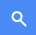
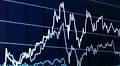
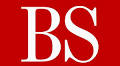

In [3]:
import requests
company= "Happy Forgings"
company=company.replace(" ","+")
url = "https://www.google.com/search?q=all+major+news+about+"+company+"+since+last+quarter&tbm=nws"
response = requests.get(url)
raw_content=response.content ## raw content read hitting the url will return html response
raw_content

#### Data rendered on search engine UI is organised in html template with some specific structure/design like div, class, headers,.. with common tag values for each similar sections as below
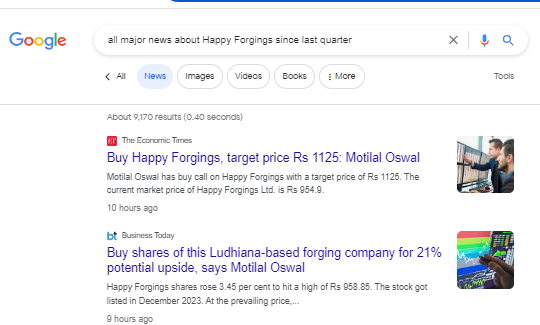
#### here, headings ['Buy Happy Forgings, target price Rs 1125: Motilal Oswal' and Buy shares of this Ludhiana-based forging company for 21% potential upside, says Motilal Oswal] will be having a similar html tag values, similary brief content of them will be having similar template again

###### have used beautiful scoup which can prase the html data, to which will be passing the required html tag data(detected doing the inspect on the search engines output tab) to scoup

In [4]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(raw_content,'html.parser')

###### if i made a mistake in giving the proper search query, google gives suggested search with corrections applied as below,
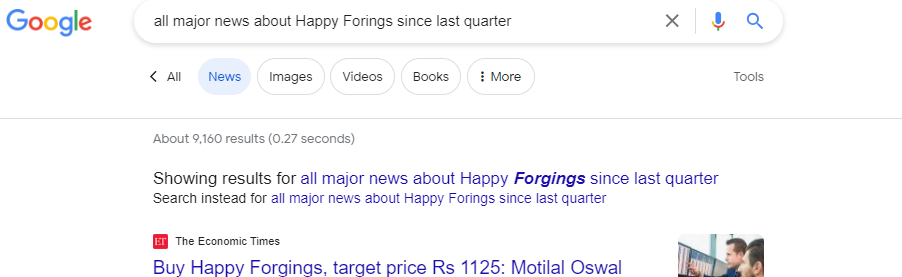
###### will correct the url as per that suggestion for proper results

In [5]:
##below given html attributes, 'div',{'class':"Va3FlbEE3Upf lVm3ye"}, soup will try to find the data for it,
##which is unique for the above correction section alone
updated_search = soup.findChild('div',{'class':"Va3FlbEE3Upf lVm3ye"})

In [6]:
## if above code is able to find such corrections, it'll return not empty result having that correction,
## in which  case, will be updating the search url with them
if(updated_search != None):
    ##to get the corrected data
    updated_search = updated_search.find('a').text
    ##url reconstruction with as per the corrected search
    new_url = "https://www.google.com/search?q="+updated_search.replace(' ','+')+'&tbm=nws'
    response = requests.get(new_url)
    original_content=response.content
    soup = BeautifulSoup(original_content,'html.parser')

###### from above attached images, we can get, both of news headlines as well as brief insights into it are providing us the useful insights, so will be fetching both of them for further analysis as below,

In [7]:
company_news=[]
## to get all the news heading, passing the html attributes(from inspect)
all_titles = soup.findAll('h3',{'class':"zBAuLc l97dzf"})
## to get descriptions under each heading, passing the html attributes(from inspect)
descriptions = soup.findAll('div',{'class':"BNeawe s3v9rd AP7Wnd"})
for i in range(0,len(all_titles)):
    company_news.append({'title':all_titles[i].text,'decription':descriptions[i].text})
company_news

[{'title': 'Buy Happy Forgings, target price Rs 1125: Motilal Oswal',
  'decription': 'Motilal Oswal has buy call on Happy Forgings with a target price of Rs 1125. The current market price of Happy Forgings Ltd. is Rs 954.9.1 week ago'},
 {'title': 'Happy Forgings shares climb 2% after fresh order win. Details here',
  'decription': 'Motilal Oswal has buy call on Happy Forgings with a target price of Rs 1125. The current market price of Happy Forgings Ltd. is Rs 954.9.1 week ago'},
 {'title': 'Motilal Oswal Recommends Buying Happy Forgings with Target Price of Rs 1125',
  'decription': "Happy Forgings share price: Today's upward move in the share price came after the company announced that it has secured an order from a...3 weeks ago"},
 {'title': 'Happy Forgings IPO Day 1: Issue subscribed 2.31 times; retail portion booked 3x | Mint',
  'decription': "Happy Forgings share price: Today's upward move in the share price came after the company announced that it has secured an order from a

In [8]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

to try getting polarity score for a sample input data:

In [9]:
analyser.polarity_scores("Happy Forgings Director Sudhir Ramaswamy quit before his 5 years term, effective im.... 1 day ago.")

{'neg': 0.0, 'neu': 0.638, 'pos': 0.362, 'compound': 0.7783}

###### above sample input data is kind of negative in tems of company's performance point of view, as a man in higher position is leaving before his term, but the builtin nltk sentiment analysis gave nearly positive rating to it worngly(neg sentiment is 0 here)
###### so this is avoided adding custom negative words in point of stocks/company's data to exisitng nltks' data

In [10]:
custom_negative_words = [
    'bankruptcy', 'downgrade', 'loss', 'decline', 'bearish', 'underperform', 'weak', 
    'sell-off', 'crash', 'lawsuit', 'scandal', 'corruption', 'fraud', 'layoff', 
    'recession', 'volatility', 'downturn', 'setback', 'dismal', 'unfavorable', 
    'penalty', 'liquidation', 'disappointing', 'warning', 'breach', 'selloff', 
    'resign', 'deficit', 'debt', 'default', 'downfall', 'collapse', 
    'shortfall', 'plunge', 'slump', 'bust', 'controversy', 'crisis', 'risk', 
    'unstable', 'instability', 'divestment', 'downward', 'layoffs', 'sanction', 
    'malpractice', 'downgrade', 'scam', 'unethical', 'mismanagement', 'bankrupt'
]

###### just adding the above set of words as negative indicators will only help when exact word match happens when performing sentiment analysis
###### to handle the cases of words with similar meaning, need to load synonyms for each of the above words as well, which again am utlizing nltk wordnet, in below

In [11]:
from itertools import chain
from nltk.corpus import wordnet
##to get synonymns of word 'resign'
print(wordnet.synsets('resign'))
set(chain.from_iterable([word.lemma_names() for word in wordnet.synsets('resign')]))
##so all of these below synonymns will be marked as negative indicators next

[Synset('vacate.v.01'), Synset('leave_office.v.01'), Synset('release.v.08'), Synset('resign.v.04')]


{'free',
 'give_up',
 'leave_office',
 'quit',
 'reconcile',
 'release',
 'relinquish',
 'renounce',
 'resign',
 'step_down',
 'submit',
 'vacate'}

In [12]:
for neg_word in custom_negative_words:
    ##to get synonyms for each custom neg word, ex: 'resign' had 3 synonyms
    synonyms = wordnet.synsets(neg_word)
    ## to get all the words with similar meaning for all above words, ex: above one gave 3 synonyms,
    ## and each synonym inturn can have 3 similar meaning words, so it'll return 3*3 =9 words in total  
    lemmas = set(chain.from_iterable([word.lemma_names() for word in synonyms]))
    for lemma in lemmas:
        ##updating the above lister neg words with cutom neg score
        analyser.lexicon.update({lemma:-2})

###### now with updating nltk sentiment lexicons with stocks related custom data, above negative state which nearly gave positive sentiment, gives negative sentiment below(from neg 0 to neg 0.144),

In [13]:
analyser.polarity_scores("Happy Forgings Director Sudhir Ramaswamy quit before his 5 years term, effective im.... 1 day ago.")

{'neg': 0.144, 'neu': 0.529, 'pos': 0.327, 'compound': 0.5859}

In [14]:
analyser = SentimentIntensityAnalyzer()
# this one to get sentiment of text using nltk
def get_sentiment(text):
    scores = analyser.polarity_scores(text)
    pos_sentiment = scores['pos']##will be returning the positivity of a text varying btw 0 to 1
    neg_sentiment = scores['neg']
    com_sentiment = scores['compound']
    return pos_sentiment,neg_sentiment,com_sentiment

In [15]:
scores=[]
for news in company_news:
    text_to_analyze = news["title"]+ " "+ news["decription"]
    scores.append(get_sentiment(text_to_analyze))

In [16]:
import pandas as pd
scores=pd.DataFrame(scores,columns=['positive','negative','compund'])

In [17]:
scores["positive"].mean()

0.27820000000000006

In [18]:
scores["negative"].mean()

0.004399999999999999

In [19]:
scores["compund"].mean()

0.8881300000000001

In [20]:
companies = ['Remedium Life', 'Waaree Renewab.', 'Dreamfolks Servi', 'Jyoti Resins', 'Esab India', 'Fine Organic', 'Crest Ventures', 'Shilchar Tech.', 'West Coast Paper', 'Share India Sec.', 'K.P. Energy', 'Apar Inds.', 'Focus Lighting', 'Ingersoll-Rand', 'Permanent Magnet', 'Sonata Software', 'Expleo Solutions', 'Coromandel Inter', 'Cigniti Tech.', 'Sharda Motor', 'Avantel', 'Seshasayee Paper', 'Fineotex Chem', 'Solar Industries', 'JTL Industries', 'Network People', 'Asian Paints', 'D-Link India', 'Bayer Crop Sci.', 'Stylam Industrie', 'BLS Internat.', 'Gujarat Gas', 'Vinati Organics', 'AGI Infra', 'Glenmark Life', 'Saksoft', 'Alkyl Amines', 'Ratnamani Metals', 'Polycab India', 'Guj.St.Petronet', 'Sr.Rayala.Hypo', 'Caplin Point Lab', 'Axtel Industries', 'Chamanlal Setia', 'KEI Industries', 'AIA Engineering', 'Integra Engg.', 'Dixon Technolog.', 'Galaxy Surfact.', 'Agarwal Indl.', 'Jash Engineering', 'J B Chem & Pharm', 'Marksans Pharma', 'Sona BLW Precis.', 'Route Mobile', 'P I Industries', 'Indigo Paints', 'GNA Axles', 'Tega Inds.', 'ICICI Lombard', 'Adani Total Gas', 'Hind.Oil Explor.', 'Affle India', 'Transpek Inds.', 'Granules India', 'Poly Medicure', 'Vidhi Specialty', 'ADF Foods', 'Latent View', 'Aarti Drugs', 'IOL Chemicals']

In [21]:
import requests
from bs4 import BeautifulSoup
def get_news(company):
    company=company.replace(" ","+")
    url = "https://www.google.com/search?q=all+major+news+about+"+company+"+since+last+quarter&tbm=nws"
    response = requests.get(url)
    raw_content=response.content ## raw content read hitting the url will return html response

    soup = BeautifulSoup(raw_content,'html.parser')
    ##below given html attributes, 'div',{'class':"Va3FlbEE3Upf lVm3ye"}, soup will try to find the data for it,
    ##which is unique for the above correction section alone
    updated_search = soup.findChild('div',{'class':"Va3FlbEE3Upf lVm3ye"})
    if(updated_search != None):
        ##to get the corrected data
        updated_search = updated_search.find('a').text
        ##url reconstruction with as per the corrected search
        new_url = "https://www.google.com/search?q="+updated_search.replace(' ','+')+'&tbm=nws'
        response = requests.get(new_url)
        original_content=response.content
        soup = BeautifulSoup(original_content,'html.parser')
    company_news=[]
    ## to get all the news heading, passing the html attributes(from inspect)
    all_titles = soup.findAll('h3',{'class':"zBAuLc l97dzf"})
    ## to get descriptions under each heading, passing the html attributes(from inspect)
    descriptions = soup.findAll('div',{'class':"BNeawe s3v9rd AP7Wnd"})
    for i in range(0,len(all_titles)):
        company_news.append({'title':all_titles[i].text,'decription':descriptions[i].text})
    all_companies_data.append({"company":company,"news":company_news})

In [22]:
all_companies_data = []
for company in companies:
    get_news(company)
print(len(all_companies_data))

71


In [23]:
import pandas as pd
final_scores = []
for company_data in all_companies_data:
    scores=[]
    for news in company_data["news"]:
        text_to_analyze = news["title"]+ " "+ news["decription"]
        score = get_sentiment(text_to_analyze)
        scores.append(score)
    scores=pd.DataFrame(scores,columns=['positive','negative','compound'])
    final_scores.append({"company":company_data["company"].replace("+"," "),
                             "pos":scores["positive"].mean(),
                             "neg":scores["negative"].mean(),
                            "comp":scores["compound"].mean()})

In [24]:
json.dumps(final_scores)

NameError: name 'json' is not defined